We start by fetching the shape of Brandenburg from OpenStreetMap:

In [1]:
import geopandas as gp

In [2]:
search_url = 'https://nominatim.openstreetmap.org/search/?q=Brandenburg,%20Germany&format=geojson&polygon_geojson=1'
brandenburg = gp.read_file(search_url)[:1]
brandenburg

place_id  osm_type  osm_id              display_name  place_rank  \
0  234763399  relation   62504  Brandenburg, Deutschland           8   

   category            type  importance  \
0  boundary  administrative    0.766083   

                                                icon  \
0  https://nominatim.openstreetmap.org/images/map...   

                                            geometry  
0  MULTIPOLYGON (((11.26623 53.12205, 11.26780 53...

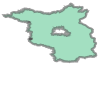

In [3]:
brandenburg.iloc[0]['geometry']

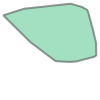

In [4]:
# let's remove the hole and simplify the shape
brandenburg_simple = brandenburg.convex_hull[0]
brandenburg_simple

Lets fetch products of interest from Scihub:

In [5]:
from sentinelsat import SentinelAPI
from datetime import date
import datetime

In [6]:
# --------------------------------------------------------------------------#
# adjust these lines to search for pictures of the fire you want to look at #
# you should not need to changed anything below this cell                   #
# --------------------------------------------------------------------------#
start_date = date(2020,6,20) - datetime.timedelta(weeks=4)
end_date = date(2020,6,20)
footprint = brandenburg_simple.wkt

In [7]:
# you need to set up the ~/.netrc in order for the login to work
api = SentinelAPI(None, None)

# the "footprint" is what we can use to preselect a certain area;
# the lake is at (51.7874, 14.4226)
# footprint = 'POLYGON((14.359428613281251 51.806620319822734,14.466545312500001 51.806620319822734,14.466545312500001 51.757343872357566,14.359428613281251 51.757343872357566,14.359428613281251 51.806620319822734))'

In [8]:
products = api.query(footprint,
                     platformname='Sentinel-2',
                     processinglevel='Level-2A',
                     date=(start_date, end_date),
                     cloudcoverpercentage=(0,30))

In [9]:
print('Found ' + str(len(products)) + ' results')

Found 56 results


## Is our entire footprint covered by the search results?

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


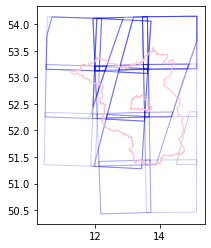

In [10]:
results = api.to_geodataframe(products)

ax = results.plot(color='', edgecolor='blue', alpha=0.2)
brandenburg.plot(ax=ax, color='', edgecolor='pink')

## When is what percentage of Brandenburg covered?

It seems that the bottom right corner of Brandenburg is not covered at all in our time frame of four weeks. Let's investigate that further; we calculate which quadrants would be necessary to cover Brandenburg in its entirety as T32 or T33 quadrants:

In [17]:
results

title  \
13da546e-c03b-4c5f-91e4-b0f8b7d78817  S2A_MSIL2A_20200617T101031_N0214_R022_T33UVV_2...   
07388c80-e0f5-4bf0-b2fc-a438495f40ed  S2A_MSIL2A_20200617T101031_N0214_R022_T33UUV_2...   
d692a650-1806-4e9b-88d1-e824f976c3ea  S2A_MSIL2A_20200617T101031_N0214_R022_T32UQD_2...   
958ef7fc-815e-47c6-b323-219de6a91339  S2A_MSIL2A_20200617T101031_N0214_R022_T33UUU_2...   
f1e2f2d4-2326-4941-80f1-0d36757a86ac  S2A_MSIL2A_20200617T101031_N0214_R022_T32UQE_2...   
f23f248d-014b-484f-bd8e-40ca23d86e9f  S2B_MSIL2A_20200615T101559_N0214_R065_T33UVV_2...   
2bf82914-7a10-46f3-82ab-9519bae23bd5  S2B_MSIL2A_20200615T101559_N0214_R065_T33UUT_2...   
b64d4450-d999-41dc-9ecb-6d263f322dd3  S2B_MSIL2A_20200615T101559_N0214_R065_T33UUU_2...   
b27cd716-4ab8-4331-ae4d-92d4c0eef10d  S2B_MSIL2A_20200615T101559_N0214_R065_T32UQD_2...   
84d95c78-0fe8-40f9-aafd-859572961234  S2B_MSIL2A_20200615T101559_N0214_R065_T32UQC_2...   
cf371332-da0e-4d99-86be-6a9d28877947  S2B_MSIL2A_20200615T101559_N0214_R065_T32UQE_2...   
220ac17c-f538-46fa-8f75-42a39cfab73d  S2B_MSIL2A_20200615T101559_N0214_R065_T33UVU_2...   
b49630c2-8fcf-4ad7-be59-c2d1bf90dc92  S2B_MSIL2A_20200615T101559_N0214_R065_T32UPD_2...   
4c3ba941-6878-4906-a03c-744bcc9533dc  S2B_MSIL2A_20200615T101559_N0214_R065_T32UPE_2...   
6fdd78bb-e2cd-4591-bcbe-3db3a09a2867  S2B_MSIL2A_20200615T101559_N0214_R065_T32UPC_2...   
97a27c3c-d9fd-4d2f-9ec5-6e7415fe2846  S2B_MSIL2A_20200615T101559_N0214_R065_T33UUV_2...   
5ab0c819-a4a7-4576-aab2-3a26c7b35330  S2B_MSIL2A_20200615T101559_N0214_R065_T33UVT_2...   
4a1a83ab-9c6e-48d4-b0f1-934dbb995a78  S2A_MSIL2A_20200613T103031_N0214_R108_T32UQD_2...   
bfbdf766-29d8-4b7a-8539-e5258ac64320  S2A_MSIL2A_20200613T103031_N0214_R108_T33UUU_2...   
156cbaf0-30ea-47e3-a810-aa8d610ddb1f  S2B_MSIL2A_20200612T100559_N0214_R022_T33UUS_2...   
1185e435-3cf7-4a3b-b05e-9bc52a2fc9f0  S2A_MSIL2A_20200603T103031_N0214_R108_T32UQE_2...   
b68e3b1e-135e-4ac4-8c7f-bef2638f9362  S2A_MSIL2A_20200603T103031_N0214_R108_T33UUV_2...   
3431eb71-1050-4421-a45a-46af0dd074b5  S2A_MSIL2A_20200603T103031_N0214_R108_T32UQD_2...   
83336edc-732b-479d-b232-f71735f95a47  S2B_MSIL2A_20200602T100559_N0214_R022_T33UVV_2...   
c332aec2-fb52-46b5-a35d-1faa2653ff7b  S2B_MSIL2A_20200602T100559_N0214_R022_T33UVU_2...   
232c1390-a40c-48ff-9112-416e9efe7357  S2B_MSIL2A_20200602T100559_N0214_R022_T33UVS_2...   
6b78b831-3e21-497c-a825-c888b3dac134  S2B_MSIL2A_20200602T100559_N0214_R022_T33UUS_2...   
0c98e3f5-e1a7-4446-8df3-046b2315c83f  S2B_MSIL2A_20200602T100559_N0214_R022_T32UQE_2...   
eb6b190c-7c19-4784-bc37-7a78d0cd8ca3  S2B_MSIL2A_20200602T100559_N0214_R022_T32UQC_2...   
e6cace69-b712-4a09-b30d-c503b596a946  S2B_MSIL2A_20200602T100559_N0214_R022_T33UUV_2...   
f6f9ca26-8737-471b-9660-72791b848f27  S2B_MSIL2A_20200602T100559_N0214_R022_T33UUT_2...   
3886a9bb-2a36-470e-b4fb-204177ee4a14  S2B_MSIL2A_20200602T100559_N0214_R022_T32UQD_2...   
10190cf1-5690-48a3-b71e-861629703a3f  S2B_MSIL2A_20200602T100559_N0214_R022_T33UUU_2...   
e385d397-4d1b-4fa2-a1ce-917f420c86dd  S2A_MSIL2A_20200531T102031_N0214_R065_T33UUU_2...   
b831e2e0-b713-4e0f-8f75-ff38d1004abd  S2A_MSIL2A_20200531T102031_N0214_R065_T33UVV_2...   
c0fa0369-9967-43bc-a6dc-6d84b460ae07  S2A_MSIL2A_20200531T102031_N0214_R065_T33UVU_2...   
3c8bcd63-ac68-4947-a7de-a42ffae7ffa5  S2A_MSIL2A_20200531T102031_N0214_R065_T32UQE_2...   
141d5ea4-6099-4851-84bc-0b218f29acff  S2A_MSIL2A_20200531T102031_N0214_R065_T32UQD_2...   
bb89884a-4302-42ec-aadc-88ddc4d9e321  S2A_MSIL2A_20200531T102031_N0214_R065_T33UUV_2...   
c7c9c5fc-6a0f-42ef-8ffa-995b159a02d3  S2A_MSIL2A_20200531T102031_N0214_R065_T32UPE_2...   
8050217e-fb00-4ca2-9067-ab9709160c76  S2B_MSIL2A_20200530T100029_N0214_R122_T33UVT_2...   
7ae7f022-69a7-48cf-af8c-4ac762f22e8a  S2B_MSIL2A_20200529T102559_N0214_R108_T32UPD_2...   
c8de3c94-262f-442f-962a-f782cd607d99  S2B_MSIL2A_20200529T102559_N0214_R108_T33UUU_2...   
513989d4-0de0-40ae-8602-a95e8326d61d  S2B_MSIL2A_20200529T102559_N0214_R108_T3

The previous approach was this:

> We're picking our product by the following criteria:
>
> - It should be taken on the same date
> - It should only use one projection
> - It should have only a low cloud covoer percentage

But now we need to screw the same projection part. The new approach looks like this:

- Group pictures by day
- Use the ones with the lowest cloud cover percentage

In [13]:
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [14]:
results_per_day = results.groupby(results['ingestiondate'].dt.strftime('%Y-%m-%d')).count()['title']
most_results_per_day = results_per_day.sort_values(ascending=False).head(3)
most_results_per_day

ingestiondate
2020-06-16    12
2020-06-02    10
2020-05-31     7
Name: title, dtype: int64

Do those days cover our entire footprint?

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


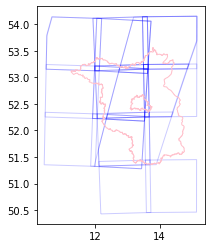

In [15]:
most_result_dates = set(most_results_per_day.index)

ax = results[results['ingestiondate'].dt.strftime('%Y-%m-%d').isin(most_result_dates)].plot(color='', edgecolor='blue', alpha=0.2)
brandenburg.plot(ax=ax, color='', edgecolor='pink')

<span style='color: #f00'>**OOPS**</span> The top left corner is sometimes missing (ex. taking 7 August).

Nicey. Does one day cover all?

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


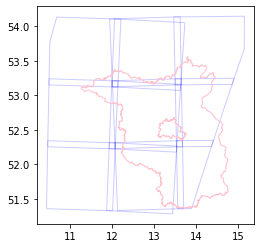

In [31]:
ax = results[results['ingestiondate'].dt.strftime('%Y-%m-%d') == '2020-06-16'].plot(color='', edgecolor='blue', alpha=0.2)
brandenburg.plot(ax=ax, color='', edgecolor='pink')

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


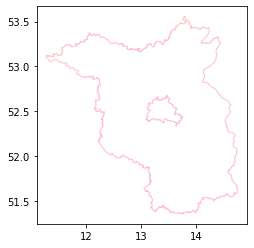

In [32]:
ax = results[results['ingestiondate'].dt.strftime('%Y-%m-%d') == '2020-06-22'].plot(color='', edgecolor='blue', alpha=0.2)
brandenburg.plot(ax=ax, color='', edgecolor='pink')

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


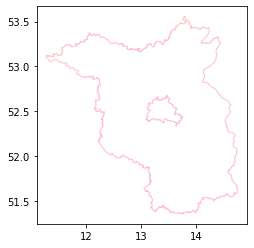

In [33]:
ax = results[results['ingestiondate'].dt.strftime('%Y-%m-%d') == '2020-06-27'].plot(color='', edgecolor='blue', alpha=0.2)
brandenburg.plot(ax=ax, color='', edgecolor='pink')

Hmmm… that's not really ideal, is it? Let's take another approach and see for each date, regardless of how many results we have.

On 2020-06-17


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


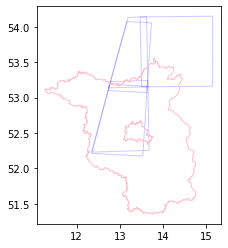

On 2020-06-16


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


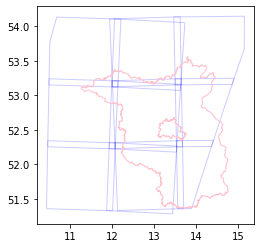

On 2020-06-13


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


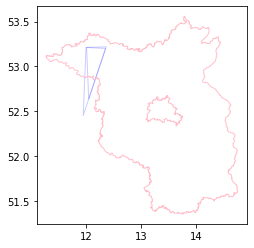

On 2020-06-12


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


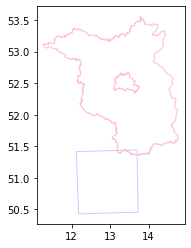

On 2020-06-03


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


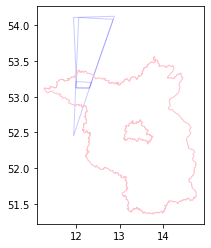

On 2020-06-02


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


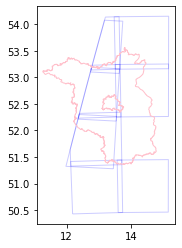

On 2020-05-31


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


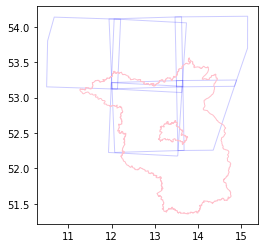

On 2020-05-30


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


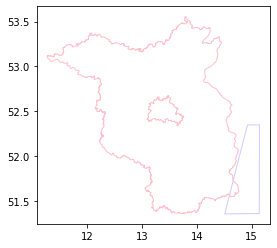

On 2020-05-29


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


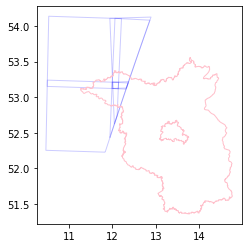

On 2020-05-28


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


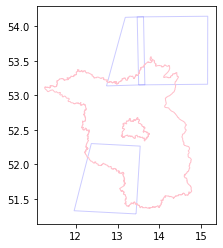

On 2020-05-26


/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


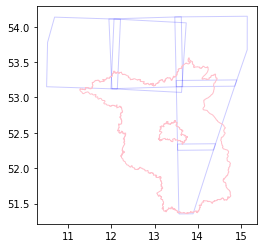

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

formatted = results['ingestiondate'].dt.strftime('%Y-%m-%d')
dates = formatted.unique()
for d in dates:
    on_this_date = results[formatted == d]
    print('On ' + d)
    ax = on_this_date.plot(color='', edgecolor='blue', alpha=0.2)
    brandenburg.plot(ax=ax, color='', edgecolor='pink')
    plt.savefig('output/' + d + '.svg')
    plt.show()

In [35]:
# let's just pick 16th and 22nd
to_download = {k: p for k, p in products.items() if p['ingestiondate'].date() in {date(2020, 6, 16), date(2020, 6, 22)}}

In [36]:
# TODO: Clean this up; at the moment we don't use cloud cover as a metric, but we might later
# Maybe something like "the most recent image without cloud cover" makes sense? And then compare Berlin
# and the whole area of Brandenburg?
# let's pick between 16th, 22nd and 27th

def calc_cloudcover(products):
    cloudcover = [v['cloudcoverpercentage'] for v in products]
    return sum(cloudcover) / len(products)

calc_cloudcover(to_download.values())

11.736200083333335

In [37]:
# we create the directory structure we need for the following notebooks
! mkdir -p input/raster/brandenburg_mosaic

In [38]:
print('Downloading {} files…'.format(len(to_download)))

In [39]:
downloaded, _, _ = api.download_all(to_download, 'input/raster/brandenburg_mosaic')
downloaded_paths = [d['path'] for d in downloaded.values()]

## Previewing Downloaded Files

In [25]:
from pathlib import Path

import rasterio as r
from rasterio import plot

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
Path(downloaded_paths[1]).name

'S2B_MSIL2A_20200615T101559_N0214_R065_T33UUT_20200615T141117.zip'

In [27]:
import zipfile

def band_paths(p, bands, resolution=None):
    '''
    Given a zip file at `p`, returns the paths inside p to the raster files containing
    information for the given bands. Because some bands are available in more than one
    resolution, this can be filtered by prodiding a third parameter (e.g. resolution='10m').
    
    The returned paths are formatted in the zip scheme as per Apache Commons VFS and can
    thus be directly opened by rasterio.
    '''
    with zipfile.ZipFile(p) as f:
        files = f.namelist()
        rasters = [f for f in files if f.endswith('.jp2')]
        rasters = ['zip+file://' + p + '!/' + r for r in rasters for b in bands if b in r and (not resolution or resolution in r)]
        return rasters

In [28]:
def rgb_paths(zip_file, resolution='10m'):
    return band_paths(zip_file, ['B02', 'B03', 'B04'], resolution)

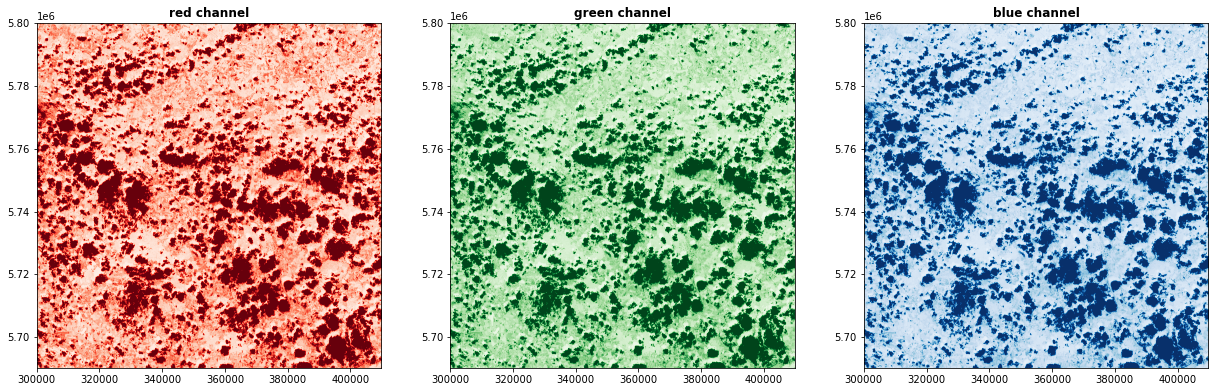

In [29]:
# preview the first downloaded image
with r.open(band_paths(downloaded_paths[1], ['TCI'], '20m')[0]) as true_color:
    # we do not need
    fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
    plot.show((true_color, 1), ax=axr, cmap='Reds', title='red channel')
    plot.show((true_color, 2), ax=axg, cmap='Greens', title='green channel')
    plot.show((true_color, 3), ax=axb, cmap='Blues', title='blue channel')
    plt.show()

In [30]:
# plotting the combined rgb image
true_color = r.open(band_paths(downloaded_paths[1], ['TCI'], '20m')[0])

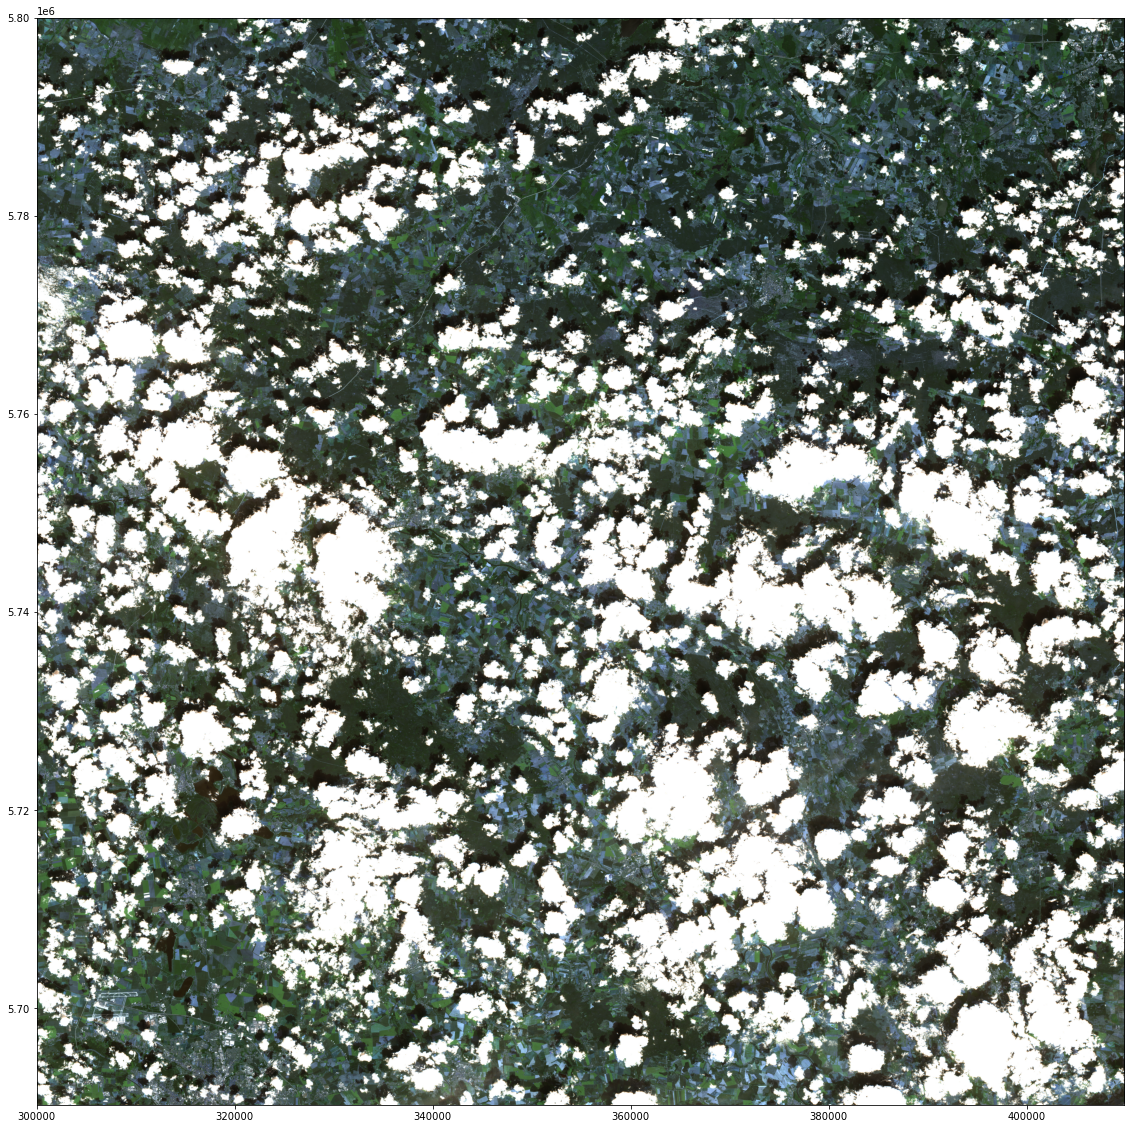

In [40]:
# note that in order to get the real colors, we need to reverse the bands into "rasterio band order"
plt.figure(figsize=(20,20))
plot.show(true_color.read()[::-1], transform=true_color.transform)
plt.show()

## Creating a True-Color Mosaic

In [41]:
from rasterio.merge import merge

### T32

In [42]:
test = [r.open(band_paths(f, ['TCI'], '60m')[0]) for f in downloaded_paths[:-1] if 'T32' in f]
test

[<open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_20200615T101559_N0214_R065_T32UQD_20200615T141117.zip!/S2B_MSIL2A_20200615T101559_N0214_R065_T32UQD_20200615T141117.SAFE/GRANULE/L2A_T32UQD_A017108_20200615T101946/IMG_DATA/R60m/T32UQD_20200615T101559_TCI_60m.jp2' mode='r'>,
 <open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_20200615T101559_N0214_R065_T32UQC_20200615T141117.zip!/S2B_MSIL2A_20200615T101559_N0214_R065_T32UQC_20200615T141117.SAFE/GRANULE/L2A_T32UQC_A017108_20200615T101946/IMG_DATA/R60m/T32UQC_20200615T101559_TCI_60m.jp2' mode='r'>,
 <open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_20200615T101559_N0214_R065_T32UQE_20200615T141117.zip!/S2B_MSIL2A_20200615T101559_N0214_R065_T32UQE_20200615T141117.SAFE/GRANULE/L2A_T32UQE_A017108_20200615T101946/IMG_DATA/R60m/T32UQE_20200615T101559_TCI_60m.jp2' mode='r'>,
 <open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_2

In [43]:
test_mosaic, test_trans = merge(test)

In [44]:
src_meta = test[0].meta
src_meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1830,
 'height': 1830,
 'count': 3,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(60.0, 0.0, 699960.0,
        0.0, -60.0, 5900040.0)}

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


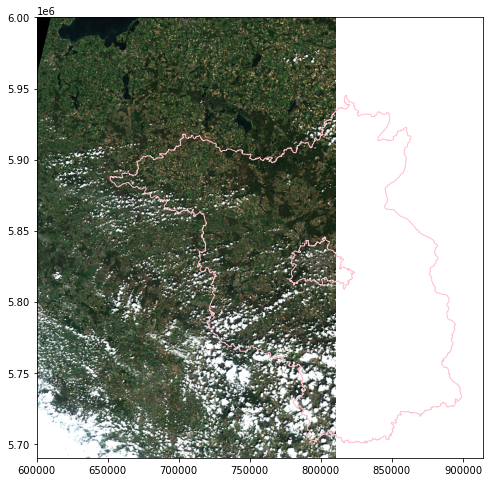

In [45]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,16))
plot.show(test_mosaic, transform=test_trans, ax=ax)
brandenburg.to_crs(src_meta['crs']).plot(ax=ax, color='', edgecolor='pink')
plt.show()

### T33

In [46]:
test = [r.open(band_paths(f, ['TCI'], '60m')[0]) for f in downloaded_paths[:-1] if 'T33' in f]
test

[<open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_20200615T101559_N0214_R065_T33UUT_20200615T141117.zip!/S2B_MSIL2A_20200615T101559_N0214_R065_T33UUT_20200615T141117.SAFE/GRANULE/L2A_T33UUT_A017108_20200615T101946/IMG_DATA/R60m/T33UUT_20200615T101559_TCI_60m.jp2' mode='r'>,
 <open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_20200615T101559_N0214_R065_T33UVV_20200615T141117.zip!/S2B_MSIL2A_20200615T101559_N0214_R065_T33UVV_20200615T141117.SAFE/GRANULE/L2A_T33UVV_A017108_20200615T101946/IMG_DATA/R60m/T33UVV_20200615T101559_TCI_60m.jp2' mode='r'>,
 <open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_20200615T101559_N0214_R065_T33UUU_20200615T141117.zip!/S2B_MSIL2A_20200615T101559_N0214_R065_T33UUU_20200615T141117.SAFE/GRANULE/L2A_T33UUU_A017108_20200615T101946/IMG_DATA/R60m/T33UUU_20200615T101559_TCI_60m.jp2' mode='r'>,
 <open DatasetReader name='zip+file://input/raster/brandenburg_mosaic/S2B_MSIL2A_2

In [47]:
test_mosaic, test_trans = merge(test)

In [48]:
src_meta = test[0].meta
src_meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1830,
 'height': 1830,
 'count': 3,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(60.0, 0.0, 300000.0,
        0.0, -60.0, 5800020.0)}

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


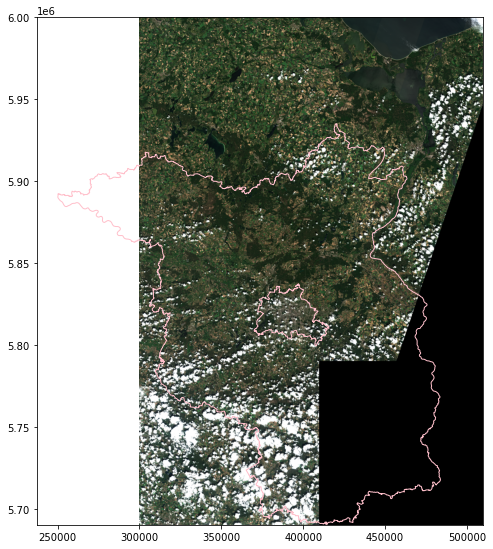

In [49]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,16))
plot.show(test_mosaic, transform=test_trans, ax=ax)
brandenburg.to_crs(src_meta['crs']).plot(ax=ax, color='', edgecolor='pink')
plt.show()

In [50]:
# coolcoolcool

In [51]:
from collections import Counter

In [52]:
# We define a RasterReaderList to read multiple raster files in one with-block;
# TODO: This is documented somewhere in the python docs, we should link to it here

class RasterReaderList():
    def __init__(self, paths):
        self.open_files = []
        self.paths = paths
    
    def __enter__(self):
        for f in self.paths:
            self.open_files.append(r.open(f))
        
        return self.open_files
    
    def __exit__(self, _type, _value, _traceback):
        for f in self.open_files:
            f.close()

In [54]:
# now we need to reproject all tiles to the same projection; for simplicity we take
# the projection that makes us do less work.

from rasterio.warp import calculate_default_transform, reproject, Resampling
from tqdm.notebook import tqdm

In [55]:
reprojected_rasters = []

# you can explicilty define a target CRS; if you want to use the most commonly used CRS
# in the downloaded tiles, set this to None. 
target_crs = 'EPSG:25833'

In [58]:
with RasterReaderList(band_paths(f, ['TCI'], '20m')[0] for f in downloaded_paths) as to_merge:
    if not target_crs:
        most_common_crs, _ = Counter([str(f.crs) for f in to_merge]).most_common()[0]
        print('The most common CRS is', most_common_crs)
        target_crs = most_common_crs
    
    for src in tqdm(to_merge, desc='Reprojecting raster files…'):
        # only reproject if necessary
        if str(src.meta['crs']) == target_crs:
            reprojected_rasters.append()
            continue
        
        # create a temporary file to write the output to
        tmp_output = Path('./tmp/reprojected/') / target_crs / Path(src.name.replace('zip+file://', '').replace('.zip!', ''))
        tmp_path = str(tmp_output).replace(tmp_output.name, '')
        ! mkdir -p {tmp_path}
        
        # print('tmp_path', tmp_path)
        
        # this is mostly taken from https://rasterio.readthedocs.io/en/latest/topics/reproject.html
        transform, width, height = calculate_default_transform(
            src.crs, target_crs, src.width, src.height, *src.bounds)
        
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': target_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        
        with r.open(tmp_output, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=r.band(src, i),
                    destination=r.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=target_crs,
                    resampling=Resampling.nearest)
            reprojected_rasters.append(tmp_output)

In [69]:
mosaic, mosaic_transform = merge([r.open(raster) for raster in reprojected_rasters])

In [71]:
mosaic_transform

Affine(20.000000000084295, 0.0, 182274.43537634303,
       0.0, -20.000000000084295, 6008151.625019694)

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


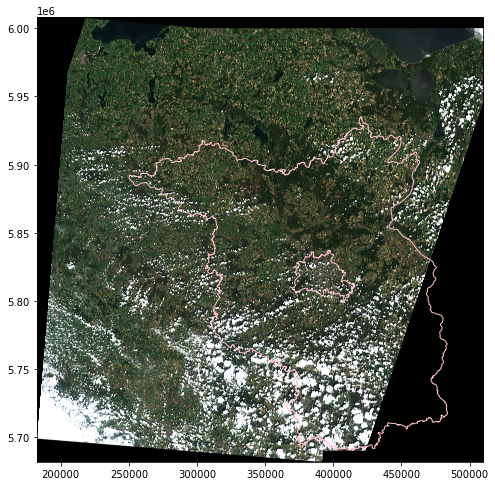

In [75]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,16))
plot.show(mosaic, transform=mosaic_transform, ax=ax)
brandenburg.to_crs(target_crs).plot(ax=ax, color='', edgecolor='pink')
plt.show()

<span style='color: #f00'>*TODO*</span> How much RAM does this cost?